In [5]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available)
import numpy as np

1.10.0
11.1
8005
NVIDIA GeForce RTX 2080 SUPER
<function is_available at 0x7f016517bb90>


In [9]:
import numpy as np

In [11]:
np.random.seed(1)
xyz1 = np.random.uniform(low=2. / 3., high=3. / 2., size=[3])
xyz2 = np.random.uniform(low=2. / 3., high=3. / 2., size=[3])
print(xyz1, xyz2)

[1.014185   1.26693708 0.66676198] [0.91861048 0.78896324 0.7436155 ]


In [15]:
images = torch.randn(1, 4).cuda()
print('images: ',images.size(1))
print('images: ',images.shape[1])
images + images.transpose(1,0)


images:  4
images:  4


tensor([[-2.7177, -0.7473, -1.8427, -1.5267],
        [-0.7473,  1.2230,  0.1277,  0.4437],
        [-1.8427,  0.1277, -0.9677, -0.6516],
        [-1.5267,  0.4437, -0.6516, -0.3356]], device='cuda:0')

# 3.LayerNorm

In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available)

1.10.0
11.1
8005
NVIDIA GeForce RTX 2080 SUPER
<function is_available at 0x7f69277d7b00>


In [17]:
# NLP Example
batch, sentence_length, embedding_dim = 2, 3, 4
embedding = torch.randn(batch, sentence_length, embedding_dim)
print(embedding)
layer_norm = nn.LayerNorm([3,4])
# Activate module
print(layer_norm(embedding))
print(layer_norm(embedding)[0])
print(layer_norm(embedding)[0][0].sum())


tensor([[[-1.1051,  0.4989,  0.3424,  0.1237],
         [ 1.2746,  0.9182,  1.4897,  0.2430],
         [-0.7926, -0.2819, -0.4140, -0.2947]],

        [[-1.2498,  0.1961, -1.6784, -1.3728],
         [ 1.6625,  0.4750, -0.6687, -0.2537],
         [-1.0218, -0.4812,  0.3327,  0.1419]]])
tensor([[[-1.6677,  0.4353,  0.2302, -0.0566],
         [ 1.4524,  0.9851,  1.7345,  0.0998],
         [-1.2579, -0.5884, -0.7615, -0.6051]],

        [[-1.0150,  0.5746, -1.4861, -1.1502],
         [ 2.1865,  0.8811, -0.3761,  0.0800],
         [-0.7644, -0.1700,  0.7247,  0.5149]]],
       grad_fn=<NativeLayerNormBackward0>)
tensor([[-1.6677,  0.4353,  0.2302, -0.0566],
        [ 1.4524,  0.9851,  1.7345,  0.0998],
        [-1.2579, -0.5884, -0.7615, -0.6051]], grad_fn=<SelectBackward0>)
tensor(-1.0587, grad_fn=<SumBackward0>)


In [ ]:
# Image Example
N, C, H, W = 20, 5, 10, 10
input = torch.randn(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
# as shown in the image below
layer_norm = nn.LayerNorm([C, H, W])
output = layer_norm(input)

# 4.MultiHeadAttention

In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available)

1.10.0
11.1
8005
NVIDIA GeForce RTX 2080 SUPER
<function is_available at 0x7f97c3e5db90>


In [19]:
from dgat import EncoderLayer

In [26]:
batch, n_point, embedding_dim = 16, 1024, 64
point = torch.randn(batch, n_point, embedding_dim)

In [42]:
net = EncoderLayer(
    n_points = 1024, 
    hidden_size = 64, 
    ffn_size = 16, 
    dropout_rate = 0.2, 
    attention_dropout_rate = 0.1, 
    num_heads = 8)
out = net(point)
out.shape

torch.Size([16, 1024, 64])

# 5.permute

In [33]:
x = torch.rand(3,4)
x = x.permute(1,0) # 等价x = x.transpose(0,1)
print(x.is_contiguous())
# x.view(3,4)

False


# 6.torch.matmul

In [35]:
# vector x vector
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
print(torch.matmul(tensor1, tensor2))
torch.matmul(tensor1, tensor2).size()

tensor(1.6841)


torch.Size([])

In [37]:
# matrix x vector
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print(torch.matmul(tensor1, tensor2))
torch.matmul(tensor1, tensor2).size()

tensor([-1.7563,  1.5355, -3.0207])


torch.Size([3])

In [38]:
# batched matrix x broadcasted vector
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3])

In [39]:
# batched matrix x batched matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])

In [40]:
# batched matrix x broadcasted matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])

In [12]:
x = 8
print(torch.Tensor([x*2]))
t = torch.rsqrt(torch.Tensor([x*2]))
print(t)

tensor([16.])
tensor([0.2500])


In [13]:
tensor1 = torch.randn(4,3,10)
print(tensor1)
# print(tensor1**2)
# (tensor1**2).sum(-1)

tensor([[[ 1.8318, -2.1450, -0.6822, -0.1236,  1.2159, -0.0918,  0.0192,
           0.8174,  0.5117,  1.7674],
         [-0.2402,  0.8335, -0.6812, -0.6867, -1.4169,  1.1560, -1.3743,
           2.0436, -1.2374,  0.6942],
         [-0.0172, -0.1068, -1.8460,  0.8580,  1.1818, -1.3940,  0.2886,
           1.1230, -0.2595,  0.0985]],

        [[-1.3557, -0.1072,  0.3108,  1.8503, -0.4144,  0.6933,  1.0114,
           0.3520, -0.3381, -0.1580],
         [ 1.0739, -0.5102, -1.2506,  0.4457, -1.6371,  2.0840,  0.6711,
          -0.8330,  0.8469, -0.6821],
         [-0.7910,  0.7758,  1.6326,  1.4243, -0.1379,  0.6806,  0.3259,
          -0.2346,  0.3754,  1.5727]],

        [[ 0.3303,  1.6980, -2.1135,  0.7275,  0.0940,  0.9305, -1.4271,
           0.6574,  0.9763,  2.6097],
         [ 1.1016, -0.5696,  1.4202,  1.0309,  0.5686, -0.6355, -0.0241,
          -0.4592,  1.4619,  1.4926],
         [ 0.0967, -0.8110, -0.5881,  0.0598,  0.1627,  1.1831,  0.7074,
           1.0525,  0.8299,  2.8024

# 7getfeature

In [22]:
def knn(x, k):
    inner = -2*torch.matmul(x.transpose(2, 1), x)
    xx = torch.sum(x**2, dim=1, keepdim=True)
    pairwise_distance = -xx - inner - xx.transpose(2, 1)
 
    [dis,idx] = pairwise_distance.topk(k=k, dim=-1)  # (batch_size, num_points, k)
    return dis, idx

In [116]:
def get_graph_feature(x, k=20, idx=None):
    batch_size = x.size(0)
    num_points = x.size(2)
    x = x.view(batch_size, -1, num_points)
    if idx is None:
        dis, idx = knn(x, k=k)   # (batch_size, num_points, k)

    idx_base = torch.arange(0, batch_size).view(-1, 1, 1)*num_points
    # print(idx_base)
    idx = idx + idx_base
    # print(idx)
    # print(idx.shape)

    idx = idx.view(-1)
    # print(idx.shape)
    _, num_dims, _ = x.size()
    # print(num_dims)

    x = x.transpose(2, 1).contiguous()   # (batch_size, num_points, num_dims)  -> (batch_size*num_points, num_dims) #   
                                        # batch_size * num_points * k + range(0, batch_size*num_points)
    # print(x.view(batch_size*num_points, -1))
    feature = x.view(batch_size*num_points, -1)[idx, :]
    # print(feature.shape)
    feature = feature.view(batch_size, num_points, k, num_dims) 
    dis = knn_d(feature)
    
    torch.set_printoptions(precision=6, sci_mode=False)
    print(dis)
    # print(dis.max(-1)[0].view(batch_size,1).repeat(1 ,num_points))
    # ddds = dis*(dis.max(-1)[0].view(batch_size,1)**-1)
    # print(ddds)
    # print(F.softmax(ddds,-1))
    # 0, 1-k
    x = x.view(batch_size, num_points, 1, num_dims).repeat(1, 1, k, 1)
    
    feature = torch.cat((feature-x, x), dim=3).permute(0, 3, 1, 2).contiguous()
  
    return feature

In [117]:
def knn_d(x_n):
    mid = x_n[:,:,1:,:].sum(-2)
    dis = torch.sum((x_n[:,:,0,:]-mid)**2, dim=-1)
    dis_norm = dis*(dis.max(-1)[0].view(x_n.shape[0],1)**-1)
    dis_norm = F.softmax(dis_norm,-1)
    return dis_norm

In [122]:
feature = get_graph_feature(tensor1,3)
print(feature.shape)
# print(dis)

tensor([[0.073389, 0.101918, 0.082286, 0.109176, 0.086354, 0.091507, 0.074837,
         0.194072, 0.093283, 0.093179],
        [0.154172, 0.078565, 0.070879, 0.165289, 0.072626, 0.064443, 0.101062,
         0.109489, 0.096287, 0.087189],
        [0.069652, 0.156259, 0.117989, 0.070088, 0.115365, 0.070676, 0.173243,
         0.068074, 0.074791, 0.083865],
        [0.085190, 0.126136, 0.077618, 0.187947, 0.081406, 0.122887, 0.076807,
         0.069529, 0.101189, 0.071291]])
torch.Size([4, 6, 10, 3])


# softmax

## 1.transformer

In [2]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available)

1.10.0
11.1
8005
NVIDIA GeForce RTX 2080 SUPER
<function is_available at 0x7f51ce1b0b90>


In [3]:
import numpy as np
class TransformerBlock(nn.Module):
    def __init__(self, d_points, d_model, k=16) -> None:
        super().__init__()
        # self.fc1 = nn.Linear(d_points, d_model) # d_model=512, d_points = 32  换nn.Conv1d
        self.w_qs = nn.Linear(d_points, d_model, bias=False)
        self.w_ks = nn.Linear(d_points, d_model, bias=False)
        self.w_vs = nn.Linear(d_points, d_model, bias=False)
        self.softmax = nn.Softmax(dim=-1)
        self.fc2 = nn.Linear(d_model, d_points)
        self.bn1 = nn.BatchNorm1d(d_points)
        self.relu = nn.ReLU()
    # xyz: b x n x 3, features: b x n x f
    def forward(self, features):
        pre = features # 64
        x = features
        q, k, v = self.w_qs(x), self.w_ks(x), self.w_vs(x)
        kT = k.transpose(-1, -2)
        # attn = self.fc_gamma(torch.matmul(q,kT))
        attn = torch.matmul(q,kT)
        print('attn1:',attn[0])
        attn = self.softmax(attn/np.sqrt(k.size(-1)))  # b x n x k x f # TODO:哪个维度上比较好；测试-1，-2
        print('attn2:',attn[0])
        res = torch.matmul(attn, v)

        res = F.leaky_relu(self.fc2(res).permute(0, 2, 1).permute(0, 2, 1), negative_slope=0.2)
        # res = self.fc2(res) + pre
        res = res + pre
        return res,attn

In [4]:
feature_ = torch.randn(16,128,64)
print(feature_.shape)
print(feature_[0][0])

torch.Size([16, 128, 64])
tensor([-0.5414, -0.9031,  0.3236,  1.9962,  0.5230,  0.5210,  0.2130, -0.6453,
         1.4494,  1.1793, -0.8177, -0.6899,  0.8516, -0.6705, -0.2310,  0.4779,
        -0.1349, -0.7198, -1.5921,  0.9039, -0.4156,  1.8736, -0.1357, -1.9280,
        -1.6880, -0.6222,  0.4380,  0.1509, -0.3450,  0.9252,  1.2000,  0.6194,
         0.4186,  0.1835,  1.1727,  1.9540, -0.7123, -0.3773,  0.9254, -1.7212,
        -0.3027,  1.3766,  0.2114,  1.8738,  1.6405, -1.1977,  0.4483, -1.8511,
        -0.2044,  0.3098, -0.7019, -1.3123,  0.0454,  0.8904, -0.8133,  0.2480,
        -1.5999,  1.3874,  0.4459,  0.7788, -0.2255, -0.3059,  2.8222,  0.8043])


In [5]:
net = TransformerBlock(64, 8)
res,attn = net(feature_)

attn1: tensor([[-0.0431,  0.1406, -0.7545,  ...,  0.1656,  0.1821, -0.1532],
        [-0.1482,  0.2176, -0.7107,  ..., -0.1055, -0.2453,  0.3159],
        [-0.5330, -0.0696,  1.3331,  ...,  0.4679,  0.9447, -1.0380],
        ...,
        [ 0.3676, -0.2995,  0.4981,  ...,  1.0681, -0.3059, -1.2408],
        [ 0.2667, -0.2290,  0.1779,  ..., -0.2418, -0.1657,  0.7894],
        [-0.5927,  0.3633,  0.4172,  ..., -0.1893,  0.1195, -1.1275]],
       grad_fn=<SelectBackward0>)
attn2: tensor([[0.0072, 0.0077, 0.0056,  ..., 0.0077, 0.0078, 0.0069],
        [0.0074, 0.0084, 0.0060,  ..., 0.0075, 0.0071, 0.0087],
        [0.0058, 0.0068, 0.0112,  ..., 0.0083, 0.0098, 0.0049],
        ...,
        [0.0083, 0.0066, 0.0087,  ..., 0.0106, 0.0065, 0.0047],
        [0.0086, 0.0072, 0.0083,  ..., 0.0072, 0.0074, 0.0103],
        [0.0056, 0.0078, 0.0080,  ..., 0.0064, 0.0072, 0.0046]],
       grad_fn=<SelectBackward0>)


## 画热力图

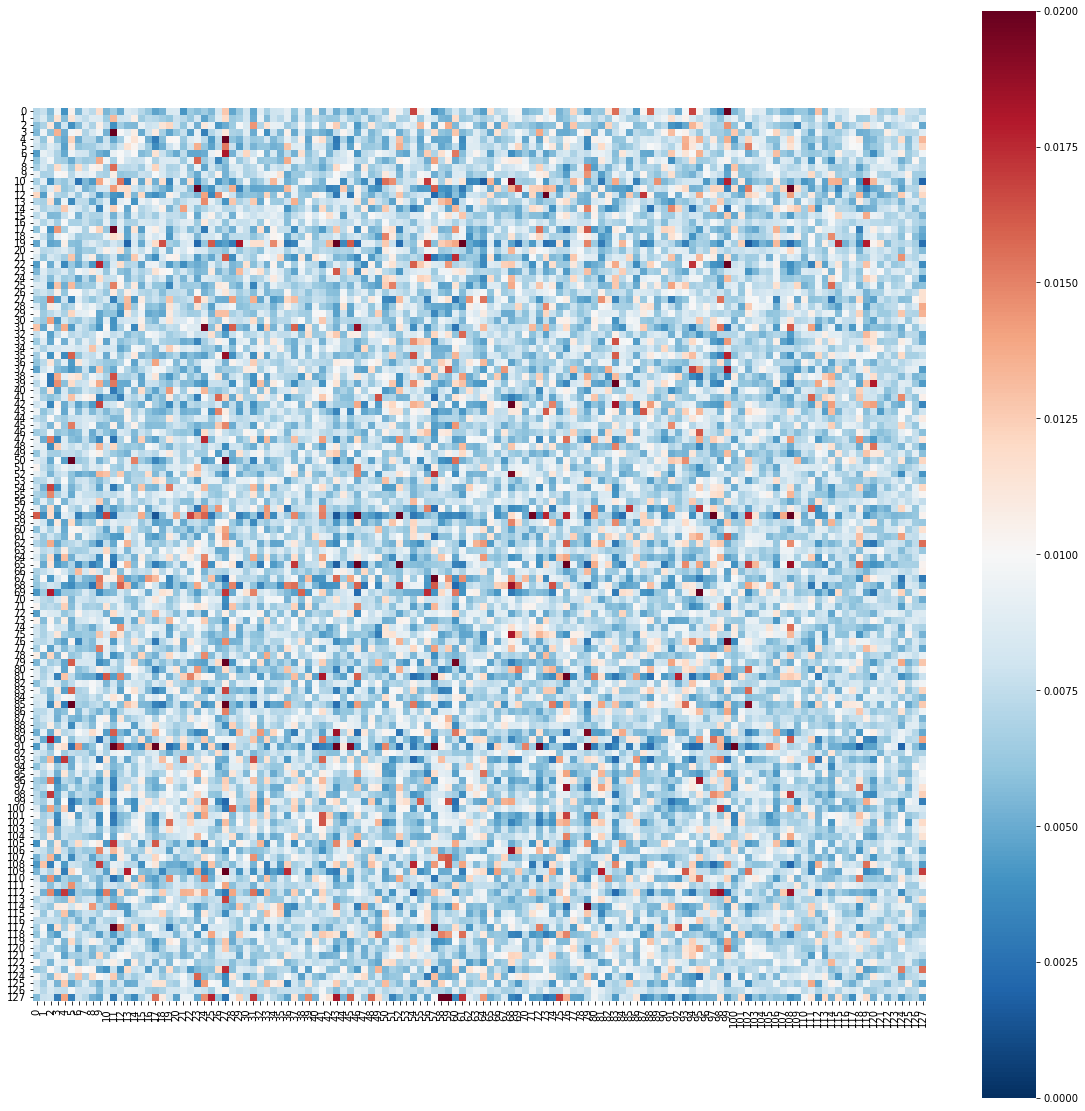

In [11]:
# -*- coding: UTF-8 -*-
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# a = np.random.rand(4,3)

a = np.array([[1,0.107562,0.270034,0.266753],
              [0.107562,1,0.543716,0.540923],
              [0.270034,0.543716,1,0.950266],
              [0.266753,0.540923,0.950266,1]])

fig, ax = plt.subplots(figsize = (20,20))
#二维的数组的热力图，横轴和数轴的ticklabels要加上去的话，既可以通过将array转换成有column
#和index的DataFrame直接绘图生成，也可以后续再加上去。后面加上去的话，更灵活，包括可设置labels大小方向等。
# sns.heatmap(pd.DataFrame(np.round(a,2), columns = ['img0', 'img1', 'img2','img3'], index = ['img0', 'img1', 'img2','img3']),
#                 annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="Blues")
# print(attn.detach().numpy().size())
sns.heatmap(attn.detach().numpy()[0],
                vmax=0.02,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="RdBu_r")
                
#sns.heatmap(np.round(a,2), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True,
#            square=True, cmap="YlGnBu")
# ax.set_title('二维数组热力图', fontsize = 18)
# ax.set_ylabel('image', fontsize = 18)
# ax.set_xlabel('iamge', fontsize = 18) #横变成y轴，跟矩阵原始的布局情况是一样的
plt.savefig('./out.png')
plt.show()


# 9.AdaptiveMaxPool2d

In [18]:
m = nn.AdaptiveMaxPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
print(m(input).shape)
# target output size of 7x7 (square)
m = nn.AdaptiveMaxPool2d(7)
input = torch.randn(1, 64, 10, 9)
print(m(input).shape)
# target output size of 10x7
m = nn.AdaptiveMaxPool2d((None, 7))
input = torch.randn(1, 64, 10, 9)
print(m(input).shape)

torch.Size([1, 64, 5, 7])
torch.Size([1, 64, 7, 7])
torch.Size([1, 64, 10, 7])


# 10.数据标准化

In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())
import numpy as np

1.8.1+cu111
11.1
8005
NVIDIA GeForce RTX 3090
True


/home/chengle/anaconda3/envs/ptf/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
point = torch.randn(2,3*3)
print(point.shape)
print(point)
print(point.max())
print(point.min())

torch.Size([2, 9])
tensor([[-0.2349,  0.0659,  0.6797, -0.4863,  0.1510, -0.6653, -0.4496, -0.6118,
         -1.7614],
        [ 0.1045,  0.5147,  0.0226,  0.7135, -0.0570,  1.5396,  1.0885,  0.0184,
          0.7929]])
tensor(1.5396)
tensor(-1.7614)


In [91]:
bn_torch = nn.LayerNorm(9)
bn_output_torch = bn_torch(point)
print(bn_output_torch,'\n',bn_output_torch[0].max(),'\n',bn_output_torch[0].min(),bn_output_torch[1].sum(),'\n')
# LayerNorm无法直接用于点云

tensor([[ 0.2082,  0.6784,  1.6379, -0.1848,  0.8113, -0.4646, -0.1274, -0.3810,
         -2.1780],
        [-0.8040, -0.0223, -0.9599,  0.3566, -1.1116,  1.9305,  1.0709, -0.9680,
          0.5078]], grad_fn=<NativeLayerNormBackward>) 
 tensor(1.6379, grad_fn=<MaxBackward1>) 
 tensor(-2.1780, grad_fn=<MinBackward1>) tensor(-2.9802e-07, grad_fn=<SumBackward0>) 



In [9]:
bn = nn.BatchNorm1d(3)
point1 = bn(point)
print(point1.shape)
print(point1[0][0])
print(point1.max())
print(point1.min())

torch.Size([16, 3, 128])
tensor([ 0.1138,  0.7264,  0.2771, -0.4271, -0.7589,  1.2606,  0.8587, -1.2844,
        -0.2883, -0.1932, -1.8704,  0.7594,  0.1088,  0.3708, -0.7292, -0.7478,
         1.7392,  0.6922,  1.0965,  0.2296,  0.4473, -0.9546,  0.1421, -0.4125,
         1.2788, -0.1816,  0.3854,  0.4505, -0.2961,  0.4005,  0.0441,  2.3704,
         0.9643, -2.7109, -0.0296,  0.7698, -0.5101,  0.6590, -1.1375, -0.2726,
         0.5600,  0.8855, -0.9836,  0.7954,  0.4795, -0.9165,  0.4896,  0.6373,
         0.4619,  0.4706, -0.2114,  0.1957, -0.4273, -0.6394,  1.1783,  0.3782,
        -1.0645, -0.8027,  0.5074, -0.7301,  1.6426,  1.4809,  0.8428, -0.5863,
        -0.8966,  1.1437, -0.0563, -1.1479,  1.1027,  0.8460, -0.1863, -1.4974,
        -0.0083, -0.3446, -0.2018,  0.7659,  0.2205, -0.3569,  1.1793, -1.3806,
         0.2743, -0.2706, -0.9400, -0.4295,  2.1268,  0.1023, -0.3095, -1.8161,
        -1.3686,  1.8371,  0.4421, -1.9501, -2.6238, -0.7215,  0.1400, -0.9818,
         0.9848

In [16]:
bn = nn.BatchNorm1d(384)
point1 = bn(point.view(16,-1)).view(16,3,-1)
print(point1.shape)
print(point1[0][0])
print(point1.max())
print(point1.min())

torch.Size([16, 3, 128])
tensor([-0.2091,  0.7855,  0.3347, -0.1977, -1.3621,  0.5634,  0.9297, -1.3825,
        -0.7801,  0.2745, -2.1522,  0.9724, -0.0580,  0.2545, -0.3345, -1.4773,
         1.5303,  0.7782,  1.7038,  0.0719,  0.5143, -0.6254,  0.4075, -0.5886,
         1.2255, -0.4382,  0.4477,  0.1135, -0.1222,  0.9011, -0.0847,  1.9852,
         1.0722, -1.9938,  0.1183,  0.3580, -0.6181,  0.6403, -1.2097, -0.1105,
         0.7682,  1.2599, -0.9297,  0.9045,  0.6662, -0.5369,  0.4612,  0.5936,
         0.4034,  0.3657, -1.2248,  0.0995,  0.0379, -0.8137,  1.1710,  0.7539,
        -1.2928, -1.3087,  0.1974, -0.6313,  1.4417,  1.4691,  0.7310, -0.9720,
        -0.7249,  1.3081,  0.0423, -1.4027,  1.5460,  0.4764, -0.2043, -1.4769,
        -0.0352, -0.1218, -0.3406,  0.6394,  0.1262, -0.3644,  1.4584, -1.4936,
        -0.0038, -0.2881, -0.8678, -0.3376,  2.1216, -0.5037, -0.2231, -1.2936,
        -0.9668,  1.6653,  0.6778, -2.1530, -1.9506, -0.3663,  0.3346, -0.8350,
         0.4897

## bn实现

In [7]:
data =torch.tensor([[2.,  2],
                    [-1, -3],
                    [1 , -4]])
print(data,data.max(),data.min())

tensor([[ 2.,  2.],
        [-1., -3.],
        [ 1., -4.]]) tensor(2.) tensor(-4.)


In [8]:
data1 =torch.tensor([[2.],
                    [-1],
                    [1 ]])
data- data1

tensor([[ 0.,  0.],
        [ 0., -2.],
        [ 0., -5.]])

In [67]:
bn_torch = nn.BatchNorm1d(num_features=2)
bn_output_torch = bn_torch(data)
print(bn_output_torch,'\n',bn_output_torch.max(),'\n',bn_output_torch.min())

tensor([[ 1.0690,  1.3970],
        [-1.3363, -0.5080],
        [ 0.2673, -0.8890]], grad_fn=<NativeBatchNormBackward>) 
 tensor(1.3970, grad_fn=<MaxBackward1>) 
 tensor(-1.3363, grad_fn=<MinBackward1>)


In [70]:
bn_torch = nn.LayerNorm(2)
bn_output_torch = bn_torch(data)
print(bn_output_torch,'\n',bn_output_torch.max(),'\n',bn_output_torch.min())

tensor([[ 0.0000,  0.0000],
        [ 1.0000, -1.0000],
        [ 1.0000, -1.0000]], grad_fn=<NativeLayerNormBackward>) 
 tensor(1.0000, grad_fn=<MaxBackward1>) 
 tensor(-1.0000, grad_fn=<MinBackward1>)


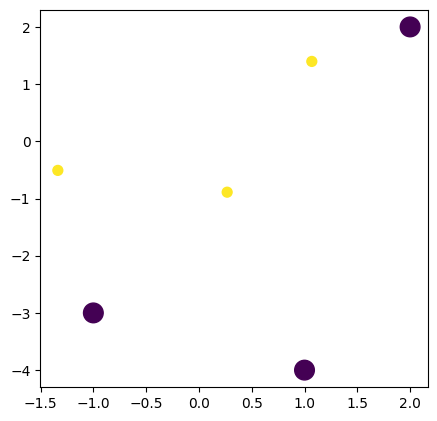

In [55]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'sans-serif'
x = [2, -1, 1,1.0690,-1.3363,0.2673]
y = [2,-3, -4,1.3970,-0.5080,-0.8890]
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(x, y, c=[1,  1, 1, 40, 40, 40], s=[200,  200,200, 50, 50, 50])

## my_bn

In [58]:
class MyBN:
    def __init__(self, momentum, eps, num_features):
        """
        初始化参数值
        :param momentum: 追踪样本整体均值和方差的动量
        :param eps: 防止数值计算错误
        :param num_features: 特征数量
        """
        # 对每个batch的mean和var进行追踪统计
        self._running_mean = 0
        self._running_var = 1
        # 更新self._running_xxx时的动量
        self._momentum = momentum
        # 防止分母计算为0
        self._eps = eps
        # 对应论文中需要更新的beta和gamma，采用pytorch文档中的初始化值
        self._beta = np.zeros(shape=(num_features, ))
        self._gamma = np.ones(shape=(num_features, ))#初始化中_beta和_gamma对应于BN中需要学习的参数，分别初始化为0和1，
    def batch_norm(self, x):
        """
        BN向传播
        :param x: 数据
        :return: BN输出
        """
        x_mean = x.mean(axis=0)
        x_var = x.var(axis=0)
        # 对应running_mean的更新公式
        self._running_mean = (1-self._momentum)*x_mean + self._momentum*self._running_mean
        self._running_var = (1-self._momentum)*x_var + self._momentum*self._running_var
        # 对应论文中计算BN的公式
        x_hat = (x-x_mean)/np.sqrt(x_var+self._eps)
        y = self._gamma*x_hat + self._beta
        return y

In [60]:
my_bn = MyBN(momentum=0.01, eps=0.001, num_features=2)
my_bn._beta = bn_torch.bias.detach().numpy()
my_bn._gamma = bn_torch.weight.detach().numpy()
bn_output = my_bn.batch_norm(data.numpy(), )
print(bn_output)

[[ 1.0687014   1.3968999 ]
 [-1.335877   -0.50796366]
 [ 0.26717535 -0.8889364 ]]


# shixuan

In [2]:
class xyz_normal(nn.Module):
    def __init__(self,dim,num):#[b , dim, num]
        super(xyz_normal, self).__init__()
        self.d,self.num=dim,num
        self.ln = nn.LayerNorm(dim*num, elementwise_affine=False)
        
    def forward(self, x):
        x = x - torch.mean(x, dim=-1, keepdim=True)
        x = x.view(x.shape[0],-1)
        x = self.ln(x).view(-1,self.d,self.num)
        return x


In [3]:
import sys
sys.path.append("../") 
from data import dataset_get
from utils import cal_loss, get_logger, read_yaml

cfg = read_yaml('../configs/config.yaml')
TRAIN_DATASET, TEST_DATASET=dataset_get(cfg.data_dir, model_name = cfg.data_name, num_points=cfg.num_point)


In [4]:
from torch.utils.data import DataLoader
trainDataLoader = DataLoader(
        TRAIN_DATASET , batch_size=32, 
        shuffle=True  , num_workers=8)
 #遍历
print(len(trainDataLoader))
train_features, train_labels = next(iter(trainDataLoader))

357


In [5]:
xyz_normal0= xyz_normal(1024,3)
_,b=xyz_normal0(train_features.permute(0,2,1).contiguous())
print(b)
print(b.shape)

tensor([[[-0.0892],
         [ 0.0816],
         [ 0.1613]],

        [[ 0.0244],
         [-0.0663],
         [ 0.1095]],

        [[ 0.1737],
         [-0.0565],
         [ 0.1009]],

        [[-0.1723],
         [ 0.0877],
         [ 0.1748]],

        [[-0.1137],
         [-0.0251],
         [-0.1546]],

        [[-0.0760],
         [ 0.1205],
         [ 0.0768]],

        [[-0.1806],
         [ 0.0700],
         [-0.1483]],

        [[ 0.0325],
         [-0.0564],
         [ 0.1145]],

        [[-0.0096],
         [-0.0775],
         [ 0.0760]],

        [[ 0.1734],
         [ 0.0994],
         [ 0.2032]],

        [[ 0.1240],
         [ 0.1128],
         [-0.1891]],

        [[ 0.1296],
         [-0.1637],
         [ 0.1119]],

        [[-0.1912],
         [-0.0295],
         [-0.0625]],

        [[ 0.1586],
         [ 0.0079],
         [-0.1043]],

        [[ 0.1309],
         [ 0.1425],
         [ 0.1225]],

        [[ 0.1832],
         [-0.1012],
         [-0.0682]],

        